In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("wastewater_data.csv")

In [4]:
df.shape

(11088, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11088 entries, 0 to 11087
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REF_DATE         11088 non-null  object 
 1   GEO              11088 non-null  object 
 2   DGUID            0 non-null      float64
 3   Measure          11088 non-null  object 
 4   Characteristics  11088 non-null  object 
 5   UOM              11088 non-null  object 
 6   UOM_ID           11088 non-null  int64  
 7   SCALAR_FACTOR    11088 non-null  object 
 8   SCALAR_ID        11088 non-null  int64  
 9   VECTOR           11088 non-null  object 
 10  COORDINATE       11088 non-null  object 
 11  VALUE            9665 non-null   float64
 12  STATUS           2142 non-null   object 
 13  SYMBOL           0 non-null      float64
 14  TERMINATED       0 non-null      float64
 15  DECIMALS         11088 non-null  int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 1.4+ MB


In [6]:
df.describe()

,DGUID,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,0.0,11088.000000,11088.0,9665.000000,0.0,0.0,11088.000000
mean,NaN,354.666667,0.0,114.492390,NaN,NaN,1.333333
std,NaN,79.670957,0.0,225.750455,NaN,NaN,0.942852
min,NaN,242.000000,0.0,0.000000,NaN,NaN,0.000000
25%,NaN,242.000000,0.0,2.300000,NaN,NaN,0.000000
50%,NaN,411.000000,0.0,23.360000,NaN,NaN,2.000000
75%,NaN,411.000000,0.0,100.000000,NaN,NaN,2.000000
max,NaN,411.000000,0.0,2459.380000,NaN,NaN,2.000000


In [7]:
#Checks for missing values
df.isnull().sum()

REF_DATE               0
GEO                    0
DGUID              11088
Measure                0
Characteristics        0
UOM                    0
UOM_ID                 0
SCALAR_FACTOR          0
SCALAR_ID              0
VECTOR                 0
COORDINATE             0
VALUE               1423
STATUS              8946
SYMBOL             11088
TERMINATED         11088
DECIMALS               0
dtype: int64

In [8]:
#Displays what percentage of missing values
df.isnull().sum() / df.shape[0] * 100

REF_DATE             0.000000
GEO                  0.000000
DGUID              100.000000
Measure              0.000000
Characteristics      0.000000
UOM                  0.000000
UOM_ID               0.000000
SCALAR_FACTOR        0.000000
SCALAR_ID            0.000000
VECTOR               0.000000
COORDINATE           0.000000
VALUE               12.833694
STATUS              80.681818
SYMBOL             100.000000
TERMINATED         100.000000
DECIMALS             0.000000
dtype: float64

<AxesSubplot:>

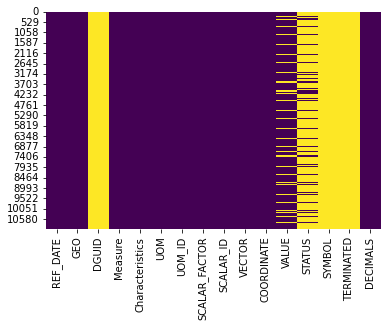

In [9]:
#visualizing missing values:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [10]:
#Checking to see if there are any special characters
for col in df.columns:
    print('{}:{}'.format(col,df[col].unique()))

REF_DATE:['Mar-19' 'Apr-19' 'May-19' 'Jun-19' 'Jul-19' 'Aug-19' 'Sep-19' 'Oct-19'
 'Nov-19' 'Dec-19' 'Jan-20' 'Feb-20' 'Mar-20' 'Apr-20' 'May-20' 'Jun-20'
 'Jul-20' 'Aug-20' 'Sep-20' 'Oct-20' 'Nov-20' 'Dec-20']
GEO:['Weighted average, cities measured' 'Halifax, Nova Scotia'
 'Montreal, Quebec' 'Toronto, Ontario' 'Edmonton, Alberta'
 'Metro Vancouver, British Columbia']
DGUID:[nan]
Measure:['THC-COOH (Cannabis metabolite)' 'Methamphetamine' 'Amphetamine'
 'Benzoylecgonine' 'Cocaine' 'Ecstasy (MDMA)' 'Morphine' 'Codeine'
 'Methadone' 'Oxycodone' 'Fentanyl' '6-monoacetylmorphine (6-MAM)'
 'Heroin' 'Acetylcodeine']
Characteristics:['Load per capita (grams per one million people per day)'
 'Lower bound of the 95% confidence interval, load per capita'
 'Upper bound of the 95% confidence interval, load per capita'
 'Standard error, load per capita' 'Imputation rate, load per capita'
 'Detection Rate (percentage of samples with positive detection)']
UOM:['Grams per one million people per day' 

In [11]:
#Counts each row/type in the coloum: GEO
df["GEO"].value_counts()

Weighted average, cities measured    1848
Halifax, Nova Scotia                 1848
Montreal, Quebec                     1848
Toronto, Ontario                     1848
Edmonton, Alberta                    1848
Metro Vancouver, British Columbia    1848
Name: GEO, dtype: int64

In [12]:
#Counts each row/type in the coloum: DGUID
df["DGUID"].value_counts()

Series([], Name: DGUID, dtype: int64)

In [13]:
#Counts each row/type in the coloum: Measure
df["Measure"].value_counts()

THC-COOH (Cannabis metabolite)    792
Methamphetamine                   792
Amphetamine                       792
Benzoylecgonine                   792
Cocaine                           792
Ecstasy (MDMA)                    792
Morphine                          792
Codeine                           792
Methadone                         792
Oxycodone                         792
Fentanyl                          792
6-monoacetylmorphine (6-MAM)      792
Heroin                            792
Acetylcodeine                     792
Name: Measure, dtype: int64

In [14]:
#Counts each row/type in the coloum: UOM
df["UOM"].value_counts()

Grams per one million people per day    7392
Percentage                              3696
Name: UOM, dtype: int64

In [15]:
#Counts each row/type in the coloum: UOM_ID
df["UOM_ID"].value_counts()

411    7392
242    3696
Name: UOM_ID, dtype: int64

In [16]:
#Counts each row/type in the coloum: SCALAR_FACTOR
df["SCALAR_FACTOR"].value_counts()

units    11088
Name: SCALAR_FACTOR, dtype: int64

In [17]:
#Counts each row/type in the coloum: SCALAR_ID
df["SCALAR_ID"].value_counts()

0    11088
Name: SCALAR_ID, dtype: int64

In [18]:
#Counts each row/type in the coloum: VECTOR
df["VECTOR"].value_counts()

v1277978059    22
v1277978390    22
v1277978403    22
v1277978402    22
v1277978401    22
               ..
v1277978222    22
v1277978221    22
v1277978220    22
v1277978219    22
v1277978562    22
Name: VECTOR, Length: 504, dtype: int64

In [19]:
#Counts each row/type in the coloum: COORDINATE
df["COORDINATE"].value_counts()

1.1.1     22
4.14.2    22
5.2.3     22
5.2.2     22
5.2.1     22
          ..
2.14.2    22
2.14.1    22
2.13.6    22
2.13.5    22
6.14.6    22
Name: COORDINATE, Length: 504, dtype: int64

In [20]:
#Counts each row/type in the coloum: VALUE
df["VALUE"].value_counts()

0.00       1682
100.00     1263
14.00       187
7.00         97
6.00         87
           ... 
11.76         1
7.83          1
999.21        1
2459.38       1
60.99         1
Name: VALUE, Length: 4551, dtype: int64

In [38]:
df["STATUS"].value_counts()

F    1423
E     719
Name: STATUS, dtype: int64

In [21]:
df.head()

,REF_DATE,GEO,DGUID,Measure,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),Load per capita (grams per one million people ...,Grams per one million people per day,411,units,0,v1277978059,1.1.1,263.21,NaN,NaN,NaN,2
1,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Lower bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978060,1.1.2,224.66,NaN,NaN,NaN,2
2,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Upper bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978061,1.1.3,301.75,NaN,NaN,NaN,2
3,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Standard error, load per capita",Grams per one million people per day,411,units,0,v1277978062,1.1.4,13.74,NaN,NaN,NaN,2
4,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Imputation rate, load per capita",Percentage,242,units,0,v1277978063,1.1.5,11.00,NaN,NaN,NaN,0


In [22]:
df[['city','province']] = df['GEO'].str.split(',', expand=True)

In [23]:
#df.head(11088)
df.head(200)

,REF_DATE,GEO,DGUID,Measure,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,city,province
0,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),Load per capita (grams per one million people ...,Grams per one million people per day,411,units,0,v1277978059,1.1.1,263.21,NaN,NaN,NaN,2,Weighted average,cities measured
1,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Lower bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978060,1.1.2,224.66,NaN,NaN,NaN,2,Weighted average,cities measured
2,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Upper bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978061,1.1.3,301.75,NaN,NaN,NaN,2,Weighted average,cities measured
3,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Standard error, load per capita",Grams per one million people per day,411,units,0,v1277978062,1.1.4,13.74,NaN,NaN,NaN,2,Weighted average,cities measured
4,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Imputation rate, load per capita",Percentage,242,units,0,v1277978063,1.1.5,11.00,NaN,NaN,NaN,0,Weighted average,cities measured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mar-19,"Montreal, Quebec",NaN,Cocaine,"Standard error, load per capita",Grams per one million people per day,411,units,0,v1277978254,3.5.4,22.42,NaN,NaN,NaN,2,Montreal,Quebec
196,Mar-19,"Montreal, Quebec",NaN,Cocaine,"Imputation rate, load per capita",Percentage,242,units,0,v1277978255,3.5.5,0.00,NaN,NaN,NaN,0,Montreal,Quebec
197,Mar-19,"Montreal, Quebec",NaN,Cocaine,Detection Rate (percentage of samples with pos...,Percentage,242,units,0,v1277978256,3.5.6,100.00,NaN,NaN,NaN,0,Montreal,Quebec
198,Mar-19,"Montreal, Quebec",NaN,Ecstasy (MDMA),Load per capita (grams per one million people ...,Grams per one million people per day,411,units,0,v1277978257,3.6.1,28.86,NaN,NaN,NaN,2,Montreal,Quebec


In [24]:
#Mean of the entire column: VALUE
print(df["VALUE"].mean())

114.49239006725287


In [25]:
print(df["UOM_ID"].mean())

354.6666666666667


In [26]:
df[1:10]

,REF_DATE,GEO,DGUID,Measure,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,city,province
1,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Lower bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978060,1.1.2,224.66,NaN,NaN,NaN,2,Weighted average,cities measured
2,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Upper bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978061,1.1.3,301.75,NaN,NaN,NaN,2,Weighted average,cities measured
3,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Standard error, load per capita",Grams per one million people per day,411,units,0,v1277978062,1.1.4,13.74,NaN,NaN,NaN,2,Weighted average,cities measured
4,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),"Imputation rate, load per capita",Percentage,242,units,0,v1277978063,1.1.5,11.00,NaN,NaN,NaN,0,Weighted average,cities measured
5,Mar-19,"Weighted average, cities measured",NaN,THC-COOH (Cannabis metabolite),Detection Rate (percentage of samples with pos...,Percentage,242,units,0,v1277978064,1.1.6,NaN,F,NaN,NaN,0,Weighted average,cities measured
6,Mar-19,"Weighted average, cities measured",NaN,Methamphetamine,Load per capita (grams per one million people ...,Grams per one million people per day,411,units,0,v1277978065,1.2.1,392.28,NaN,NaN,NaN,2,Weighted average,cities measured
7,Mar-19,"Weighted average, cities measured",NaN,Methamphetamine,"Lower bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978066,1.2.2,304.45,NaN,NaN,NaN,2,Weighted average,cities measured
8,Mar-19,"Weighted average, cities measured",NaN,Methamphetamine,"Upper bound of the 95% confidence interval, lo...",Grams per one million people per day,411,units,0,v1277978067,1.2.3,480.11,NaN,NaN,NaN,2,Weighted average,cities measured
9,Mar-19,"Weighted average, cities measured",NaN,Methamphetamine,"Standard error, load per capita",Grams per one million people per day,411,units,0,v1277978068,1.2.4,31.36,NaN,NaN,NaN,2,Weighted average,cities measured


In [27]:
df[10:1]

,REF_DATE,GEO,DGUID,Measure,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,city,province


In [28]:
df.describe()

,DGUID,UOM_ID,SCALAR_ID,VALUE,SYMBOL,TERMINATED,DECIMALS
count,0.0,11088.000000,11088.0,9665.000000,0.0,0.0,11088.000000
mean,NaN,354.666667,0.0,114.492390,NaN,NaN,1.333333
std,NaN,79.670957,0.0,225.750455,NaN,NaN,0.942852
min,NaN,242.000000,0.0,0.000000,NaN,NaN,0.000000
25%,NaN,242.000000,0.0,2.300000,NaN,NaN,0.000000
50%,NaN,411.000000,0.0,23.360000,NaN,NaN,2.000000
75%,NaN,411.000000,0.0,100.000000,NaN,NaN,2.000000
max,NaN,411.000000,0.0,2459.380000,NaN,NaN,2.000000


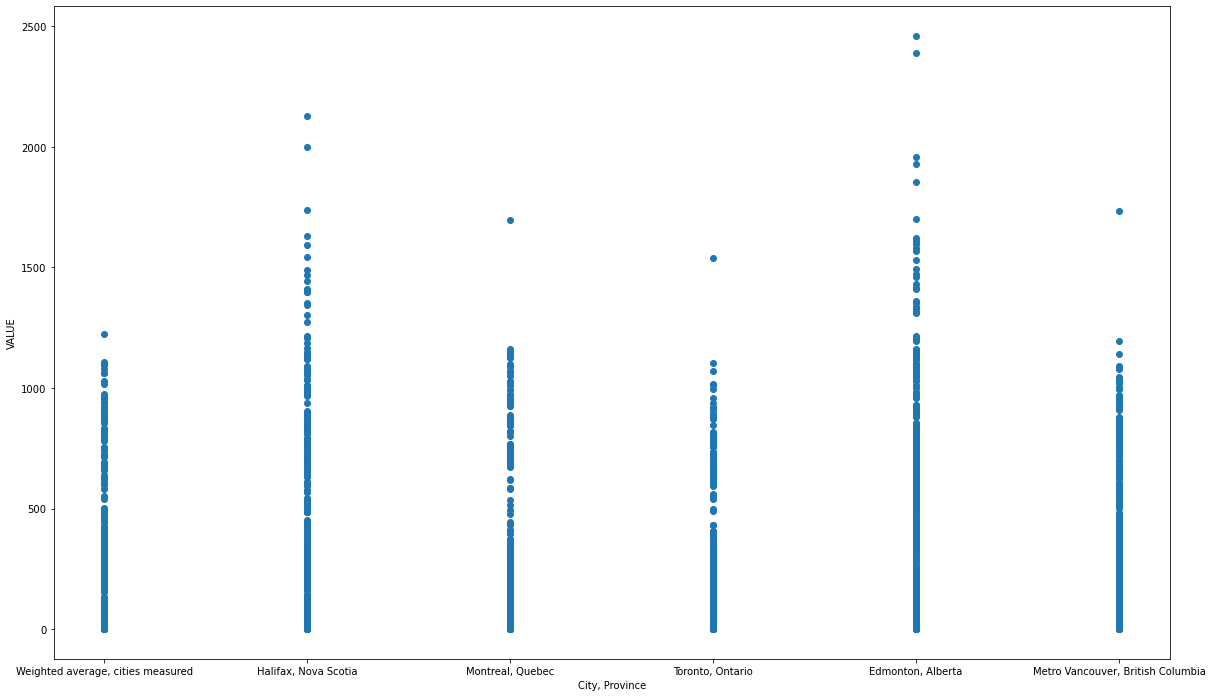

In [29]:
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(x=df["GEO"],y=df["VALUE"])
plt.xlabel("City, Province")
plt.ylabel("VALUE")

plt.show()

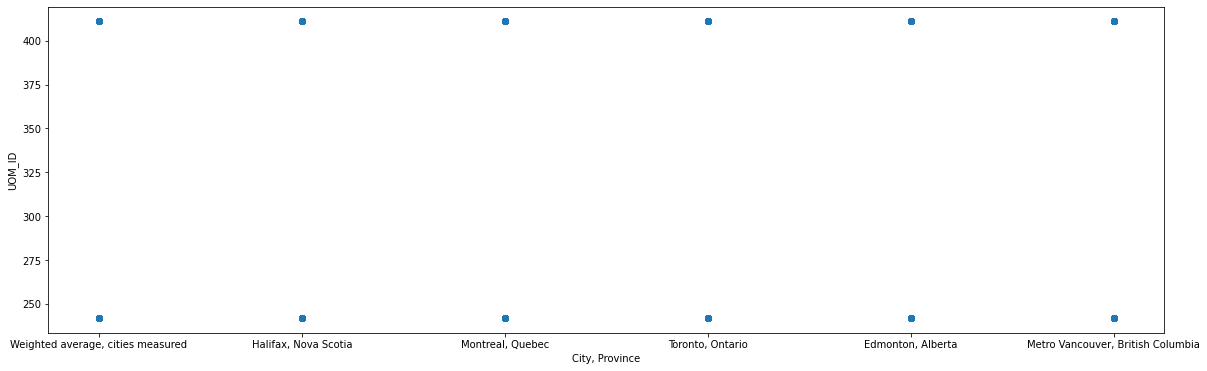

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x=df["GEO"],y=df["UOM_ID"])
plt.xlabel("City, Province")
plt.ylabel("UOM_ID")

plt.show()

In [31]:
correlations = df.corr()
print(correlations)

            DGUID    UOM_ID  SCALAR_ID     VALUE  SYMBOL  TERMINATED  DECIMALS
DGUID         NaN       NaN        NaN       NaN     NaN         NaN       NaN
UOM_ID        NaN  1.000000        NaN  0.249159     NaN         NaN  1.000000
SCALAR_ID     NaN       NaN        NaN       NaN     NaN         NaN       NaN
VALUE         NaN  0.249159        NaN  1.000000     NaN         NaN  0.249159
SYMBOL        NaN       NaN        NaN       NaN     NaN         NaN       NaN
TERMINATED    NaN       NaN        NaN       NaN     NaN         NaN       NaN
DECIMALS      NaN  1.000000        NaN  0.249159     NaN         NaN  1.000000


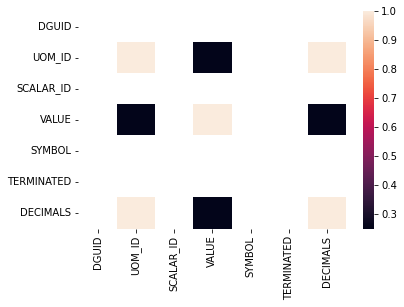

In [32]:
sns.heatmap(correlations)
plt.show()

In [40]:
df.drop(["UOM","UOM_ID","SCALAR_FACTOR","SCALAR_ID","VECTOR","COORDINATE","VALUE","STATUS"
         ,"SYMBOL","TERMINATED","DECIMALS"], axis = 1, inplace = True)
display(df)

KeyError: "['UOM' 'UOM_ID' 'SCALAR_FACTOR' 'SCALAR_ID' 'VECTOR' 'COORDINATE' 'VALUE'\n 'STATUS' 'SYMBOL' 'TERMINATED' 'DECIMALS'] not found in axis"